### COVID-19 DATA EDA

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Prepare Work Space


In [18]:
# read the dataset
df = pd.read_csv('./Datasets/cleaned_covid_dataset.csv', low_memory=False)

In [19]:
# Create 'Charts' directory if it doesn't exist
if not os.path.exists('Charts'):
    os.makedirs('Charts')


In [20]:
# helper functions
def save_plot(fig, filename):
    fig.savefig(f'./Charts/{filename}.png', bbox_inches='tight')
    plt.close(fig)


### Preprocessing

In [21]:

# Map Sex column (1=Male, 2=Female)
df['Sex'] = df['Sex'].map({1: 'Male', 2: 'Female'})


# Create 'Age_Group' column
bins = [0, 20, 40, 60, 80, 120]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


# Create 'Total_Comorbidities' column
comorbidities = ['Diabetes', 'COPD', 'Asthma', 'Immunosuppressed', 'Hypertension',
                 'Other_Disease', 'Cardiovascular_Disease', 'Obesity', 'Chronic_Renal_Disease']
df['Total_Comorbidities'] = df[comorbidities].sum(axis=1)


### Genereate summary Charts


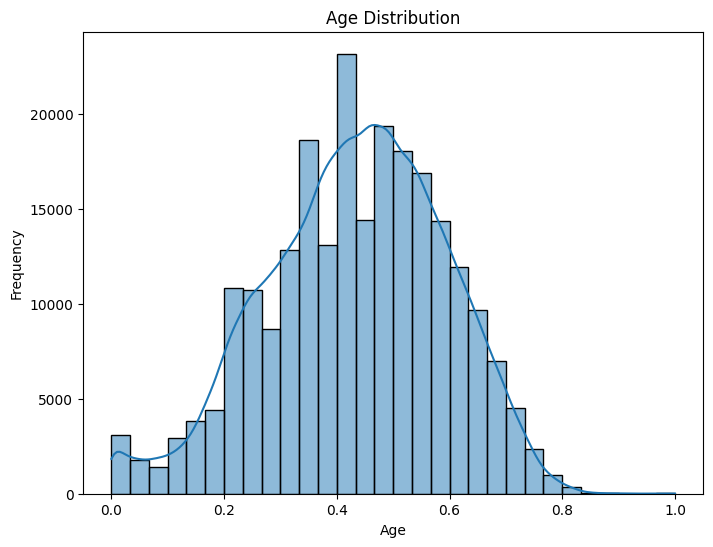

In [22]:
#1 Age Distribution
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True, ax=ax)
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
plt.show()


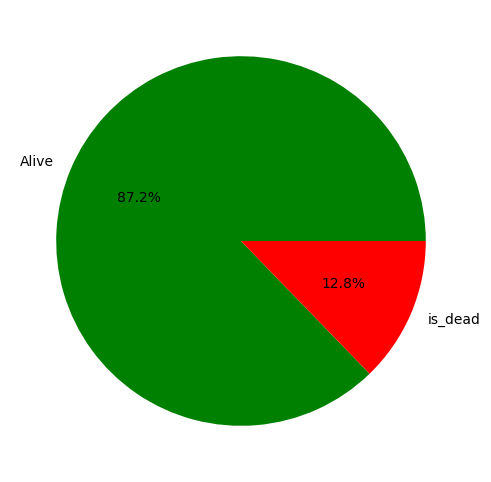

In [23]:
#2 Death Ratio
death_counts = df['is_dead'].value_counts()
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(death_counts, labels=['Alive', 'is_dead'], autopct='%1.1f%%', colors=['green', 'red'])
plt.show()



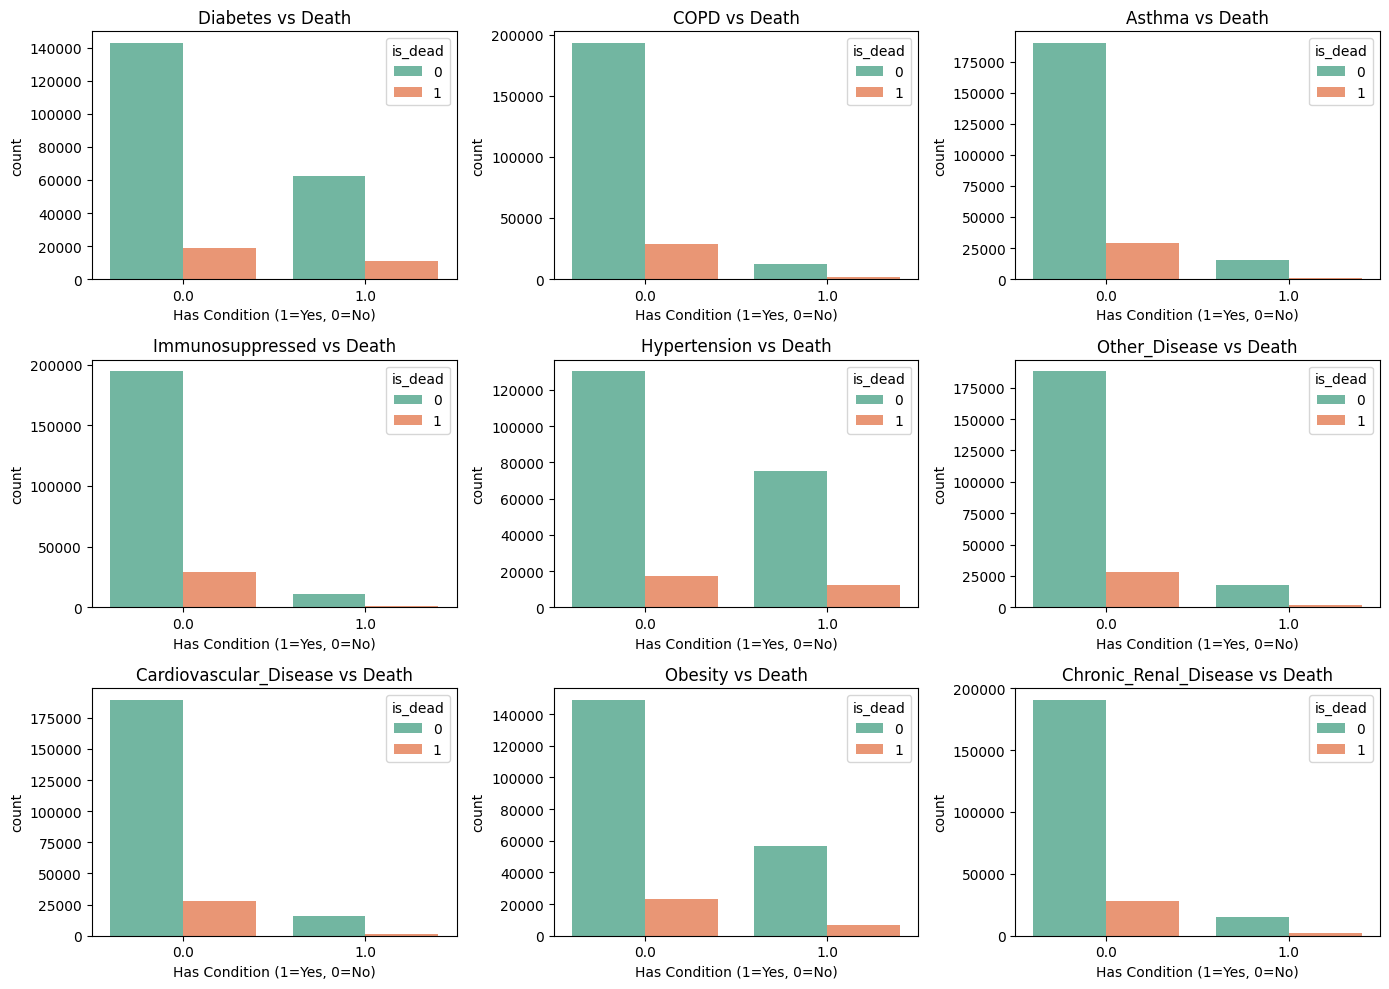

In [24]:

#3 Comorbidities vs Death
fig = plt.figure(figsize=(14, 10))
for i, comorbidity in enumerate(comorbidities):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=comorbidity, hue='is_dead', data=df, palette='Set2')
    plt.title(f'{comorbidity} vs Death')
    plt.xlabel('Has Condition (1=Yes, 0=No)')
plt.tight_layout()
plt.show()

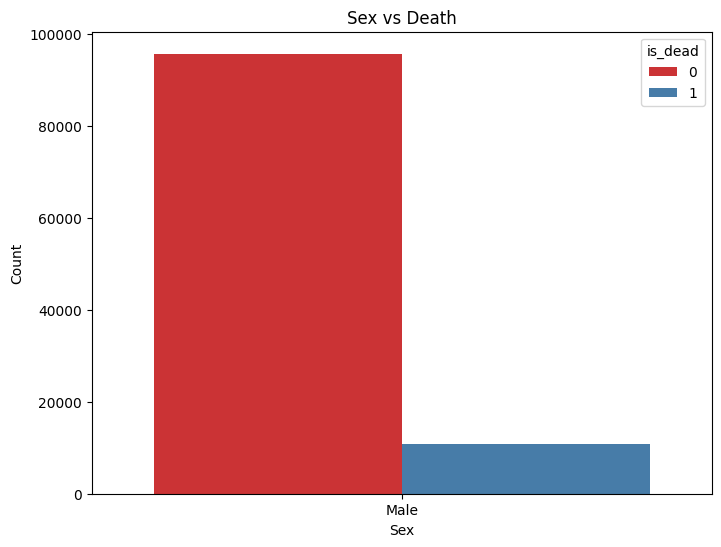

In [25]:

#4 Sex vs Death
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Sex', hue='is_dead', data=df, palette='Set1', ax=ax)
ax.set_title('Sex vs Death')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
plt.show()


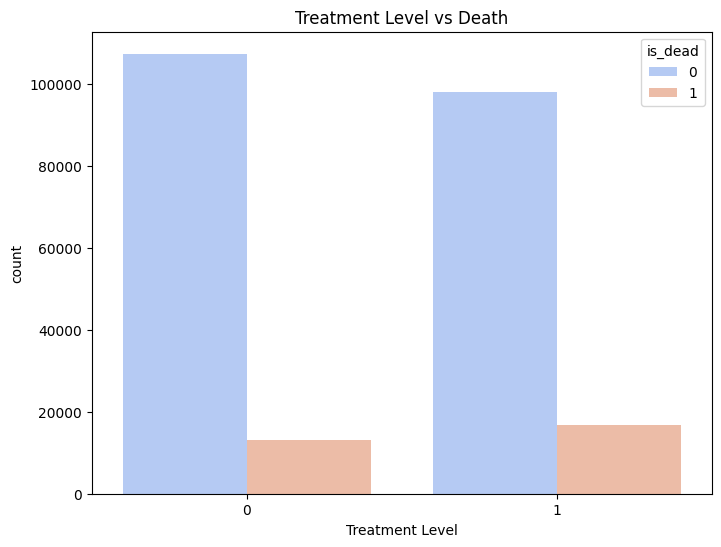

In [26]:

#5 Treatment Level vs Death
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Treatment_Level', hue='is_dead', data=df, palette='coolwarm', ax=ax)
ax.set_title('Treatment Level vs Death')
ax.set_xlabel('Treatment Level')
plt.show()


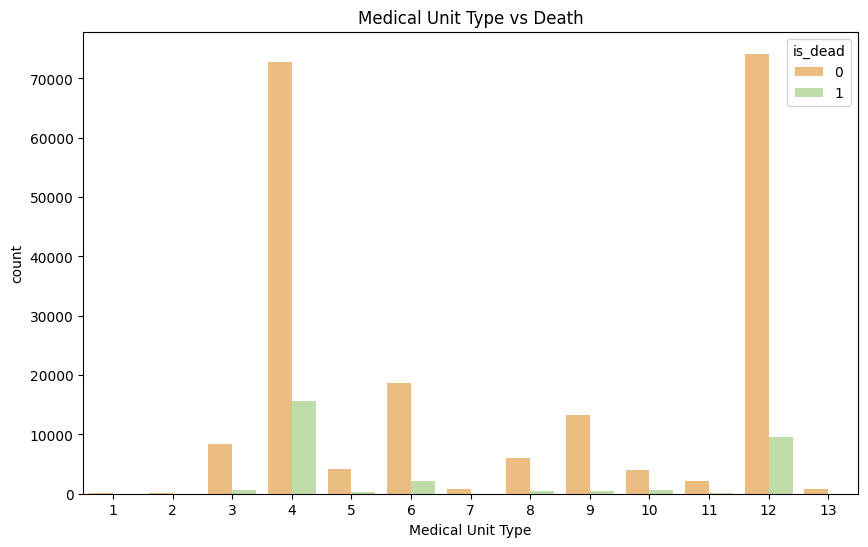

In [27]:

#6 Medical Unit Type vs Death
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Medical_Unit_Type', hue='is_dead', data=df, palette='Spectral', ax=ax)
ax.set_title('Medical Unit Type vs Death')
ax.set_xlabel('Medical Unit Type')
plt.show()


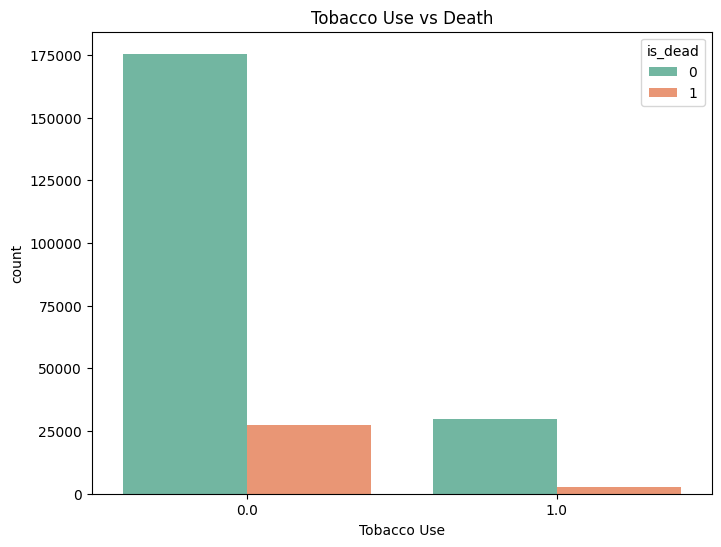

In [28]:
#7 Tobacco Use vs Death
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Tobacco_Use', hue='is_dead', data=df, palette='Set2', ax=ax)
ax.set_title('Tobacco Use vs Death')
ax.set_xlabel('Tobacco Use')
plt.show()


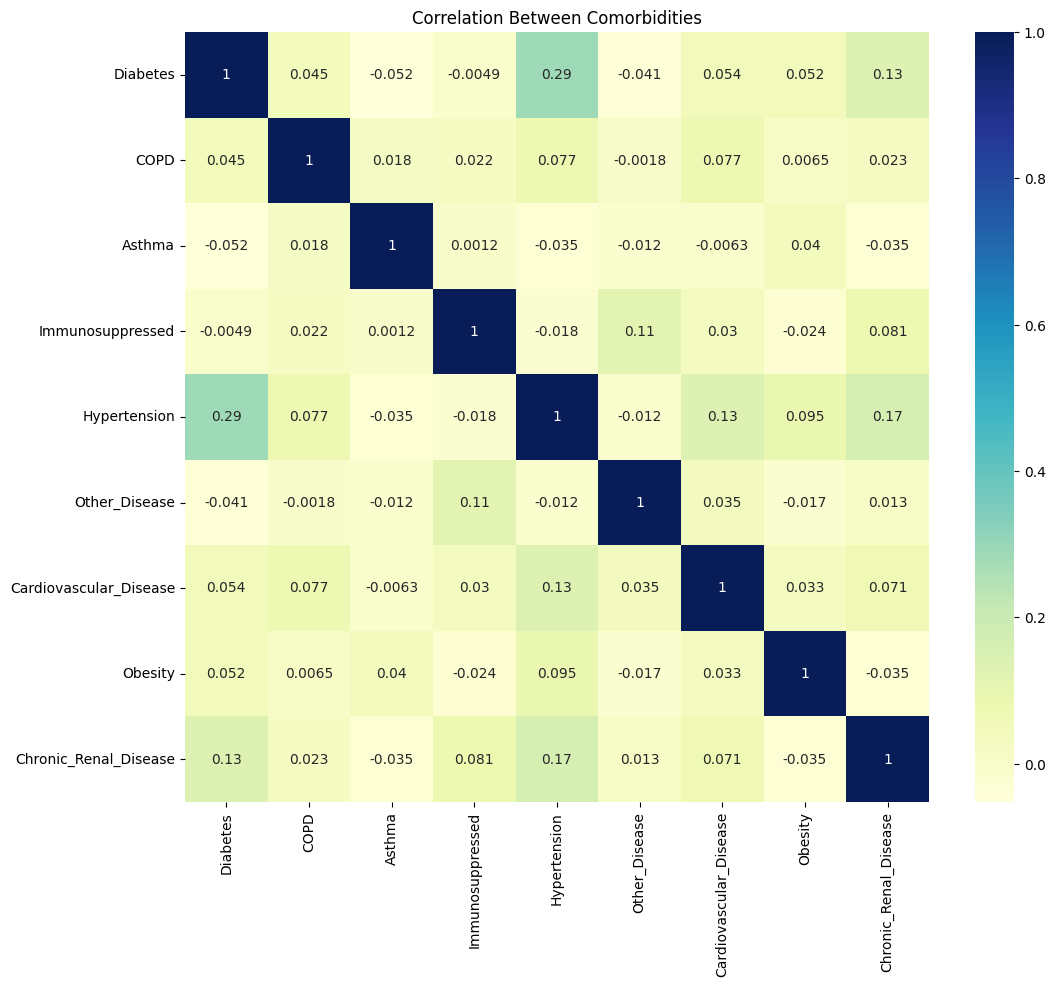

In [29]:

#8 Comorbidity Correlation Heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df[comorbidities].corr(), annot=True, cmap='YlGnBu')
ax.set_title('Correlation Between Comorbidities')
plt.show()


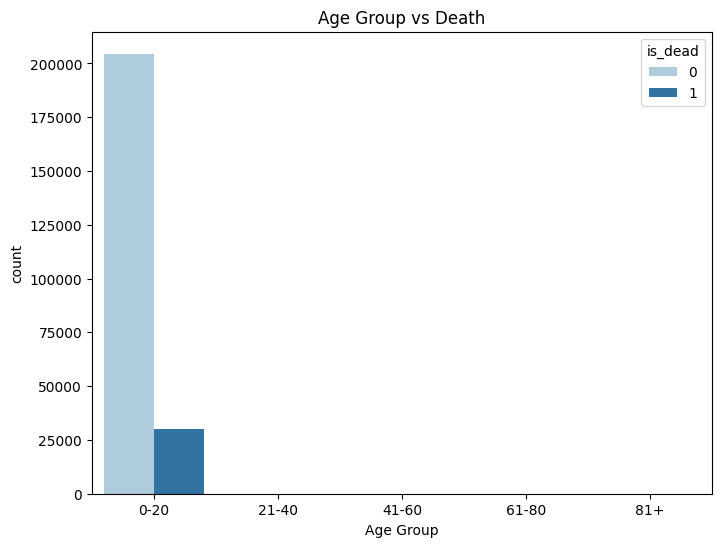

In [30]:

#9 Age Group vs Death
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Age_Group', hue='is_dead', data=df, palette='Paired', ax=ax)
ax.set_title('Age Group vs Death')
ax.set_xlabel('Age Group')
plt.show()


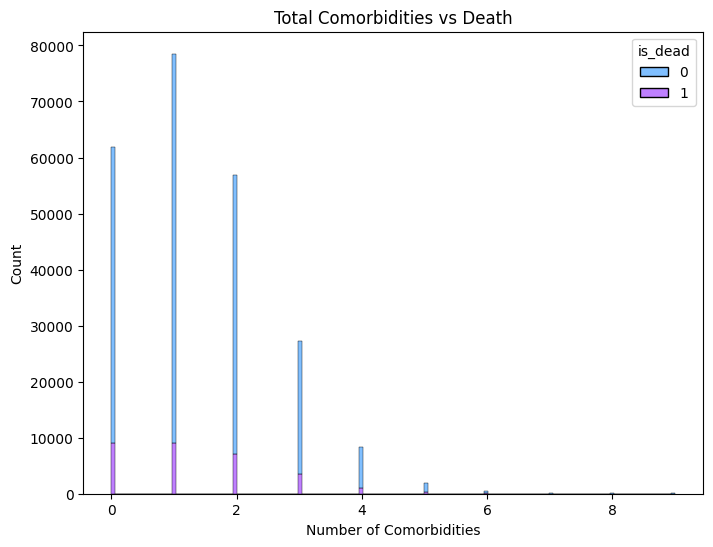

In [31]:

#10 Total Comorbidities vs Death
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(data=df, x='Total_Comorbidities', hue='is_dead', multiple='stack', palette='cool')
ax.set_title('Total Comorbidities vs Death')
ax.set_xlabel('Number of Comorbidities')
plt.show()

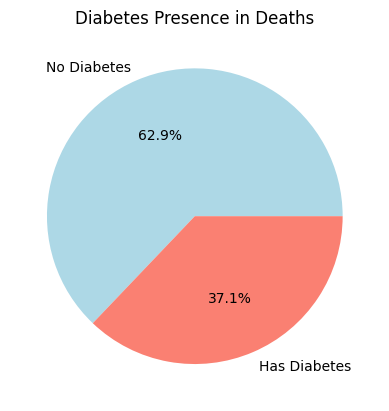

In [32]:

 #11 Percentage of diabetic patients among the deceased
chronic_death = df[df['is_dead'] == 1]['Diabetes'].value_counts()
chronic_death.index = ['No Diabetes', 'Has Diabetes']
chronic_death.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Diabetes Presence in Deaths')
plt.ylabel('')
plt.show()

C:\Users\Al forsan\AppData\Local\Temp\ipykernel_10780\493789671.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chronic_counts.index, y=chronic_counts.values, palette='coolwarm')


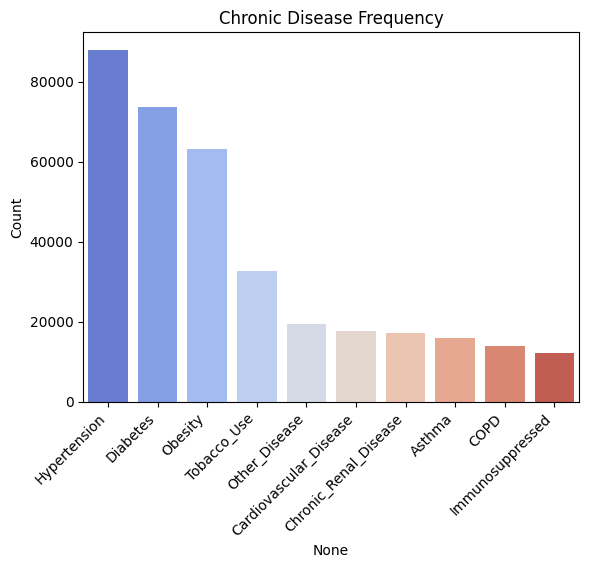

In [33]:
#12 Chronic Disease Frequency
chronic_cols = ['Diabetes', 'COPD', 'Asthma', 'Immunosuppressed',
                'Hypertension', 'Other_Disease', 'Cardiovascular_Disease',
                'Obesity', 'Chronic_Renal_Disease', 'Tobacco_Use']
chronic_counts = df[chronic_cols].sum().sort_values(ascending=False)

sns.barplot(x=chronic_counts.index, y=chronic_counts.values, palette='coolwarm')
plt.title('Chronic Disease Frequency')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.show()

C:\Users\Al forsan\AppData\Local\Temp\ipykernel_10780\3442233236.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_death = df.groupby('Age_Group')['is_dead'].sum().reset_index()
C:\Users\Al forsan\AppData\Local\Temp\ipykernel_10780\3442233236.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_death, x='Age_Group', y='is_dead', palette='Reds')


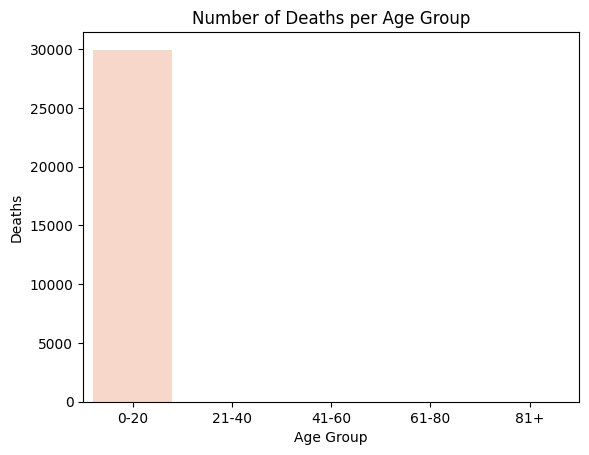

In [34]:
#13 Number of deaths in each age group
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80, 100], 
                         labels=['0-20', '21-40', '41-60', '61-80', '81+'])
age_death = df.groupby('Age_Group')['is_dead'].sum().reset_index()

sns.barplot(data=age_death, x='Age_Group', y='is_dead', palette='Reds')
plt.title('Number of Deaths per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Deaths')
plt.show()

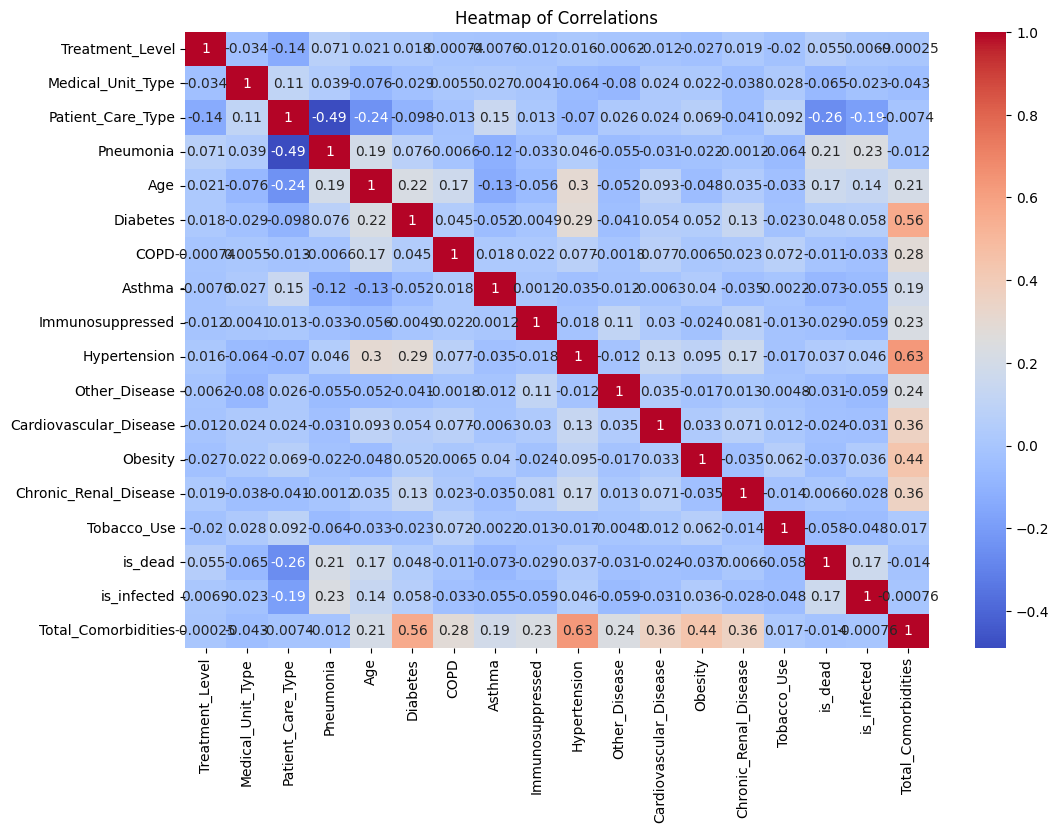

In [35]:
#14 Heatmap of Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Heatmap of Correlations")
plt.show()

### End Of EDA